In [1]:
import os
import cv2 as cv
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET

## paths variables

In [2]:
train_img_dir = "Tensorflow/workspace/images/train"
test_img_dir = "Tensorflow/workspace/images/test"

## xml to dataframe function

In [3]:
def xml_to_df(path):
    """Iterates through all .xml files (generated by labelImg) in a given directory and combines
    them in a single Pandas dataframe.

    Parameters:
    ----------
    path : str
        The path containing the .xml files
    Returns
    -------
    Pandas DataFrame
        The produced dataframe
    """

    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [4]:
trainDf = xml_to_df(train_img_dir)
testDf = xml_to_df(test_img_dir)

In [5]:
trainDf.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,0.jpg,180,270,nomask,54,31,112,106
1,0003.jpg,3000,2002,mask,1266,791,2072,1745
2,0006.jpg,1600,1063,mask,936,303,1264,632
3,0018.jpg,819,460,mask,315,101,465,238
4,0019.jpg,1600,900,mask,588,113,1046,668


In [6]:
testDf.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,0200.jpg,1200,1200,mask,340,425,878,956
1,0211.jpg,862,1149,mask,152,426,670,823
2,0x0-1583948979741.jpg,600,387,mask,161,121,209,162
3,0x0-1583948979741.jpg,600,387,mask,283,129,334,166
4,0x0-1583948979741.jpg,600,387,mask,423,124,472,164


## test image for demonstrating class label 

In [30]:
test_img_name = "_111403698_gettyimages-1207855523.JPG"

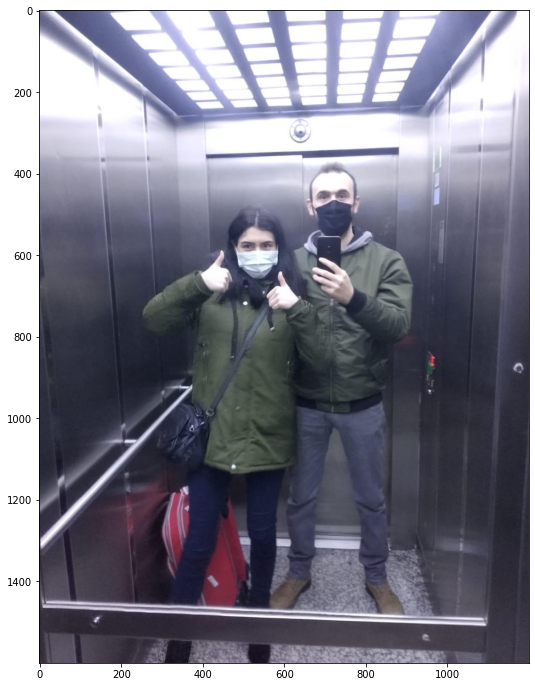

In [31]:
image_base= cv.imread(train_img_dir + "/" + test_img_name)
img_indexes = list(trainDf.loc[trainDf["filename"]==test_img_name].index)
plt.figure(figsize=(20,12))
plt.imshow(cv.cvtColor(image_base, cv.COLOR_BGR2RGB))

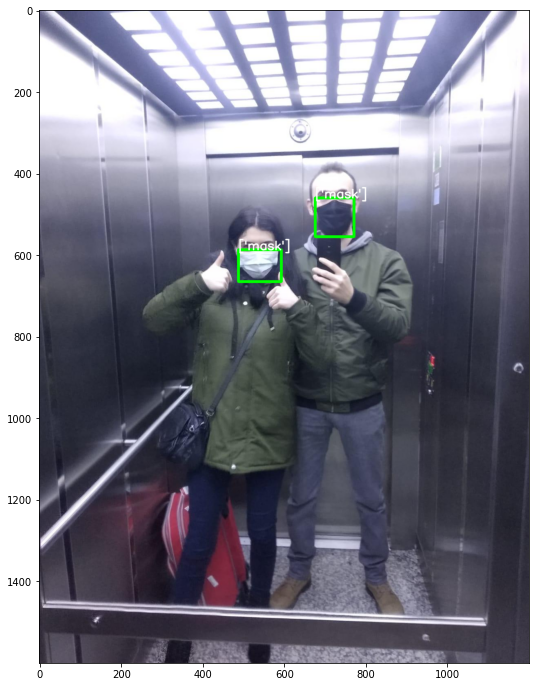

In [32]:
#scanning all class label in one picture
for index in img_indexes:
    start = tuple(trainDf.loc[index,["xmin","ymin"]].tolist())
    end = tuple(trainDf.loc[index,["xmax","ymax"]].tolist())
    image=cv.rectangle(image_base,start,end,(0,255,0),6)
    image=cv.putText(image_base,str(trainDf.loc[index,["class"]].values),start,cv.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv.LINE_AA)
plt.figure(figsize=(20,12))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

# train images class count

In [10]:
trainDf['class'].value_counts()

mask      558
nomask    461
Name: class, dtype: int64

In [11]:
print(f"Total number of test image classes is {len(trainDf.index)}")

Total number of test image classes is 1019


Text(0, 0.5, 'Counts')

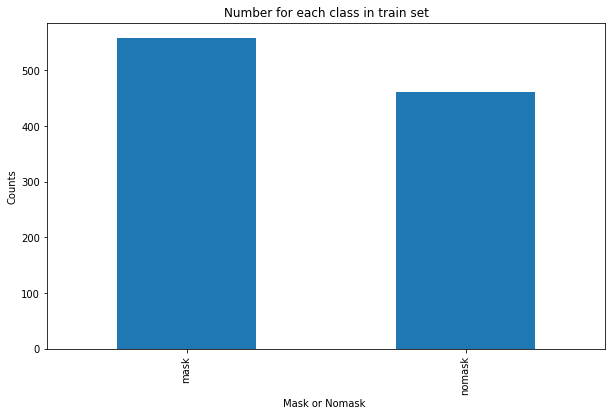

In [12]:
ax = trainDf["class"].value_counts().plot(  kind="bar",
                                            figsize=(10,6),
                                            title="Number for each class in train set")
ax.set_xlabel("Mask or Nomask ")
ax.set_ylabel("Counts")

# test images class count

In [13]:
testDf["class"].value_counts()

mask      59
nomask    55
Name: class, dtype: int64

In [14]:
print(f"Total number of test image classes is {len(testDf.index)}")

Total number of test image classes is 114


Text(0, 0.5, 'Counts')

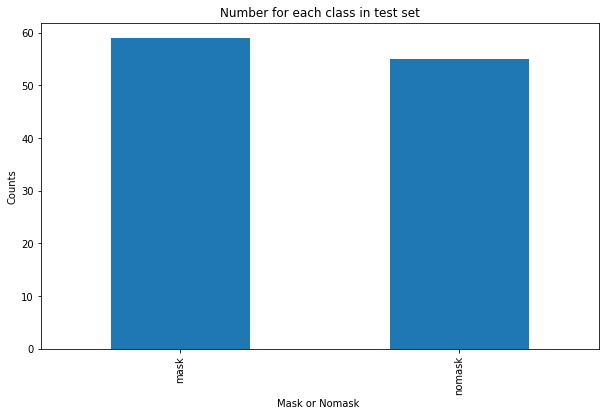

In [15]:
ax = testDf["class"].value_counts().plot(  kind="bar",
                                            figsize=(10,6),
                                            title="Number for each class in test set")
ax.set_xlabel("Mask or Nomask ")
ax.set_ylabel("Counts")